# Information Retrieval in High Dimensional Data
### Assignment 2

Members: Hashir Ahmad (03708887), Mohd Toaha Umar (03708948), Florian Auinger (03659767), Rasmus Schamper (03731039)

## Task 1

### Definitions
$\Sigma=\left( \begin{array}{rrrr}\sigma_{1} & 0 & \cdots & 0 \\0 & \ddots & 0 & \vdots \\\vdots & 0 & \ddots & 0 \\0 & \cdots & 0 & \sigma_{p} \\\end{array}\right) $ such that $ \sigma_{1} \geq \dots \geq \sigma_{p} $ 

$ \hat { \mathbf { s } } = \underset {\mathbf{s} \ \text{s.t.} \| \mathbf { s } \| = 1 }  {\arg} \max \mathbf { s } ^ { \top } \boldsymbol { \Sigma } \mathbf { \Sigma } ^ { \top } \mathbf { s } $










### Proof 
Let $ \hat{s} \in \mathbb{R}^N $ and $ \Sigma \in \mathbb{R}^{N x p} $  
\begin{array}{rcl}
 \hat { \mathbf { s } } & = & \underset {\mathbf{s} \ \text{s.t.} \| \mathbf { s } \| = 1 }  {\arg} \max \mathbf { s } ^ { \top } \boldsymbol { \Sigma } \mathbf { \Sigma } ^ { \top } \mathbf { s }  \\
\Rrightarrow s_{i} & = & \underset {\mathbf{s_{i}} \ \text{s.t.} \sum_{i=1}^N s_{i}^2 = 1 }  {\arg} \max \sum_{i=1}^N s_{i}^2 \sigma_{i}^2 \\
\\ \text{let} \ s_{i}^2=s_{i+1}^2=\frac{1}{N} \\
\Rrightarrow & = & s_{1}^2 \sigma_{1}^2 + s_{2}^2 \sigma_{2}^2 + \dots + s_{N}^2 \sigma_{N}^2 \Rrightarrow s_{1}^2 \sigma_{1}^2 \geq s_{2}^2 \sigma_{2}^2\ \geq \dots \geq s_{N}^2 \sigma_{N}^2    \\
\text{we want to maximize $\hat{s}$,} \\
\text{so we can project the s-component from the smallest} \\
\text{term equally on all other terms and we get :} \\
& \leq & (s_{1}^2 + \frac{s_{N}^2}{N-1}) \sigma_{1}^2 + (s_{2}^2 + \frac{s_{N}^2}{N-1}) \sigma_{2}^2 + \dots + (s_{N-1}^2 + \frac{s_{N}^2}{N-1})^2 \sigma_{N-1} \\
\text{with} \ (s_{1}^2 + \frac{s_{N}^2}{N-1}) \sigma_{1}^2 \geq (s_{2}^2 + \frac{s_{N}^2}{N-1}) \sigma_{2}^2 \geq \dots \geq (s_{N-1}^2 + \frac{s_{N}^2}{N-1}) \sigma_{N-1}^2 \\
\\
\text{when we repeat this $N-1$ times, we will finally get:}
\\& \leq & (s_{1}^2 + \frac{\sum_{i=2}^N s_{i}^2}{N-(N-1)}) \sigma_{1}^2 \\
N-(N-1)= 1 \\
s_{1}^2 + \sum_{i=2}^N s_{i}^2 = \sum_{i=1}^N s_{i}^2 \\
& = & (\sum_{i=1}^N s_{i}^2) \sigma_{1}^2 \\
& = & \sigma_{1}^2 \ \text{,since} \ \sum_{i=1}^N s_{i}^2=1 
\end{array}

This implies that the searched vector $ \hat{s}$ is: $ \hat{s} = 
 \begin{pmatrix}
    1\\
    0\\
    \vdots\\
    0
  \end{pmatrix} $
  








## Task 2

In [3]:
import numpy as np
import imageio
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Loading images from subset 0 and visualizing some random samples

In [4]:
path = 'yaleBfaces/subset0/'
T = np.zeros((2500, 0))
train_labels = list()
for i, file in enumerate(os.listdir(path)):
    img = imageio.imread(os.path.join(path, file))
    img = img.reshape(-1, 1)
    T = np.hstack((T, img))
    train_labels.append(''.join(char for char in file.split('_')[0] if char.isdigit()))
    
train_labels = np.array([int(label) for label in train_labels])
# indices = np.arange(T.shape[1])
# np.random.shuffle(indices)
# T = T.T[indices].T
# train_labels = train_labels[indices]

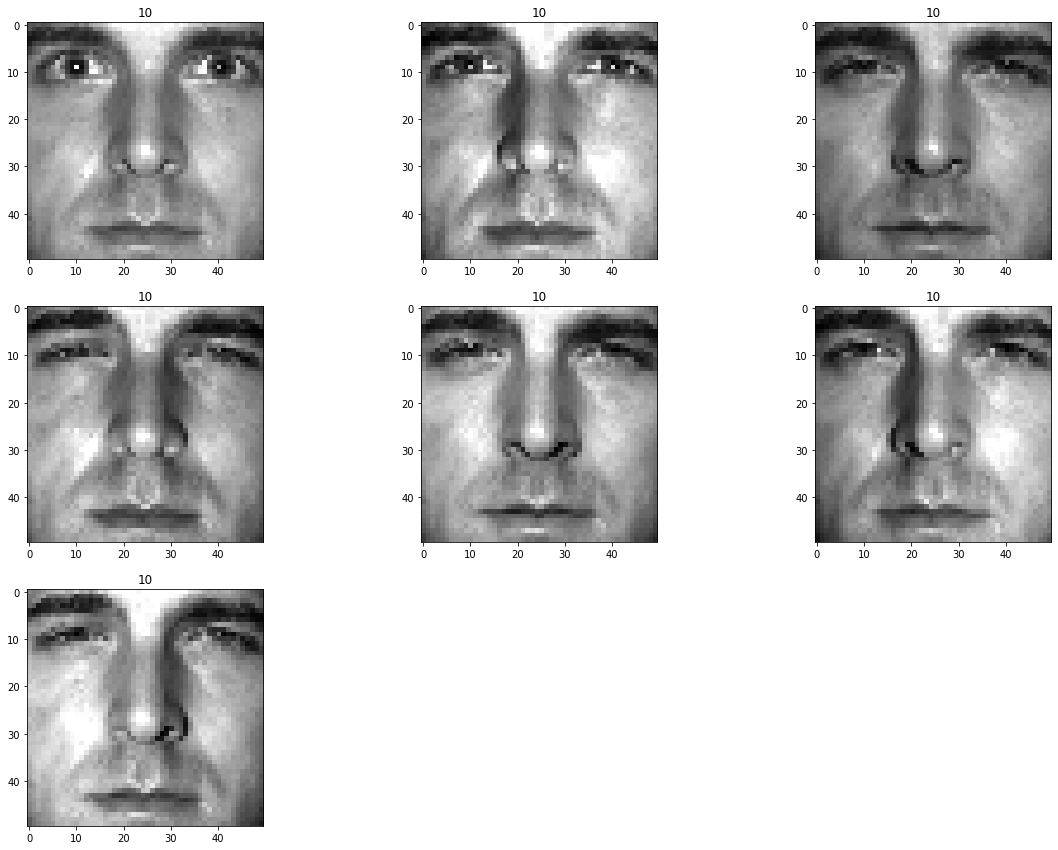

In [5]:
idx = np.random.randint(10)
def visualize(T, train_labels):
    plt.figure(figsize=(20, 20))
    for i in range(7):
        plt.subplot(4,3,i+1)
        plt.imshow(T[:,i+7*idx].reshape(50, 50), cmap='gray')
        plt.title(str(train_labels[i+7*idx]))
    plt.show()
    
visualize(T, train_labels)

### Part a) Computing the 20 first singular vectors and plotting the first 3 as images

In [6]:
def get_twenty_singular_vec(T):
    U, S, V = np.linalg.svd(T, full_matrices=False)
    return U[:,:20]

first_twenty = get_twenty_singular_vec(T)

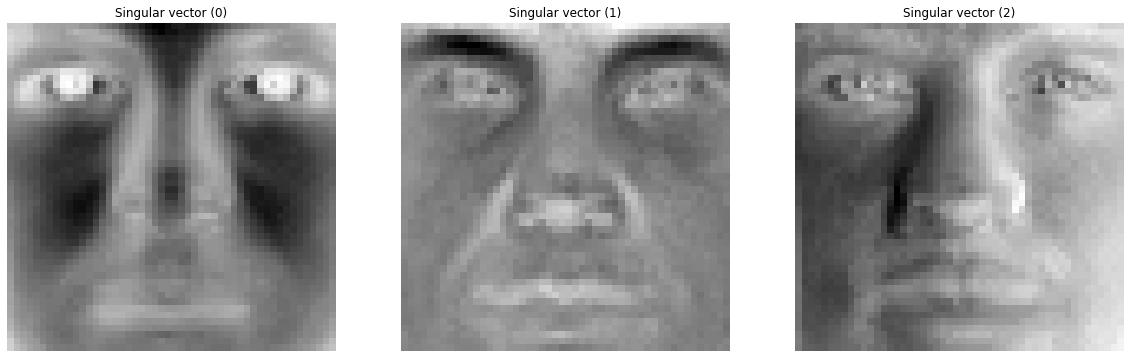

In [7]:
plt.figure(figsize=(20, 20))
plt.subplot(1,3,1)
plt.imshow(first_twenty[:,0].reshape(50, 50), cmap='gray')
plt.title('Singular vector (0)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(first_twenty[:,1].reshape(50, 50), cmap='gray')
plt.title('Singular vector (1)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(first_twenty[:,2].reshape(50, 50), cmap='gray')
plt.title('Singular vector (2)')
plt.axis('off')

plt.show()

### Loading images from subsets 1-4 

In [8]:
import re
path = 'yaleBfaces/'
test_samples = np.zeros((2500, 0))
test_labels = list()

for dir in os.listdir(path):
    if dir != 'subset0':
        for file in os.listdir(os.path.join(path, dir)):
            img = imageio.imread(os.path.join(path, dir, file))
            img = img.reshape(-1, 1)
            test_samples = np.hstack((test_samples, img))
            test_labels.append(''.join(char for char in file.split('_')[0] if char.isdigit()))
            
test_labels = np.array([int(label) for label in test_labels])
print(test_samples.shape)

(2500, 570)


### Part b) Classifying each image from the subsets 1-4 and reporting the misclassification rate for each subset

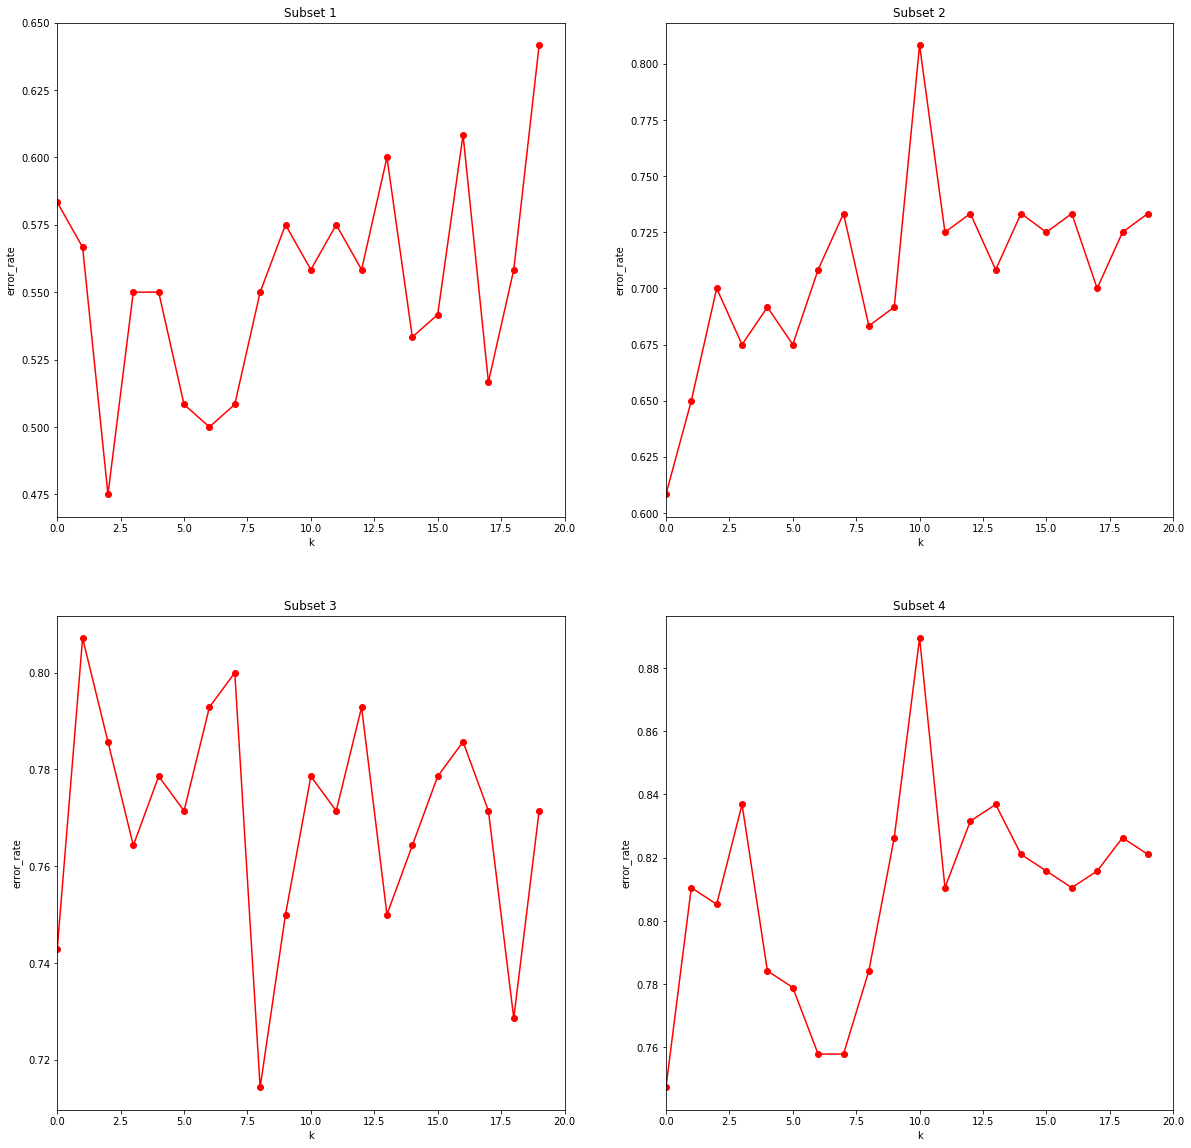

In [11]:
path = os.path.join(os.getcwd(), 'yaleBfaces/')
test_1 = test_samples[:,:120]
test_2 = test_samples[:,120:240]
test_3 = test_samples[:,240:380]
test_4 = test_samples[:,380:]
test_subsets = [test_1, test_2, test_3, test_4]

def pca_classify(T, train_labels, test_samples, test_labels, singular_vectors, k):
    W_train = np.dot(singular_vectors.T[:k+1], T)
#     print(T.shape)
#     print(singular_vectors[:,:k+1].shape)
#     W_train = T.T @ singular_vectors[:,:k+1]
#     print(W_train.shape)
    misclassified = 0
    for sample in range(test_samples.shape[1]):
        W_test = np.dot(singular_vectors.T[:k+1], test_samples[:,sample])
#         W_test = test_samples[:,sample] @ singular_vectors[:,:k+1]
        pred_image = np.zeros((2500,))
#         plt.figure(figsize=(8,8))
#         for i in range(k+1):
# #             print(np.dot(W_test[i], singular_vectors[:,i]).shape)
# #             pred_image += np.dot(W_test[i], singular_vectors[:,i])
#             plt.imshow(pred_image.reshape(50, 50), cmap='gray')
#             plt.show()
        errors = list()
        for i in range(T.shape[1]):
            errors.append(np.sqrt(np.sum(W_train[:,i] - W_test)**2))
    
        indices = np.argsort(errors)[:3]
        pred_labels = train_labels[indices]
        true_class = test_labels[sample]
        
        if not true_class in pred_labels:
            misclassified += 1
            
    return misclassified/test_samples.shape[1]
 
plt.figure(figsize=(20, 20))
for i in range(4): 
    error_rate = []
    for k in range(20):
        error_rate.append(pca_classify(T, train_labels, test_subsets[i], test_labels, first_twenty, k))
    plt.subplot(2,2,i+1)
    plt.plot(error_rate, 'ro-')
    plt.xlabel('k')
    plt.xlim([0,20])
    plt.ylabel('error_rate')
    plt.title('Subset '+str(i+1))
plt.show()

### Part c) Reporting the misclassification rate for subsets 1-4 without using the first 3 singular vectors

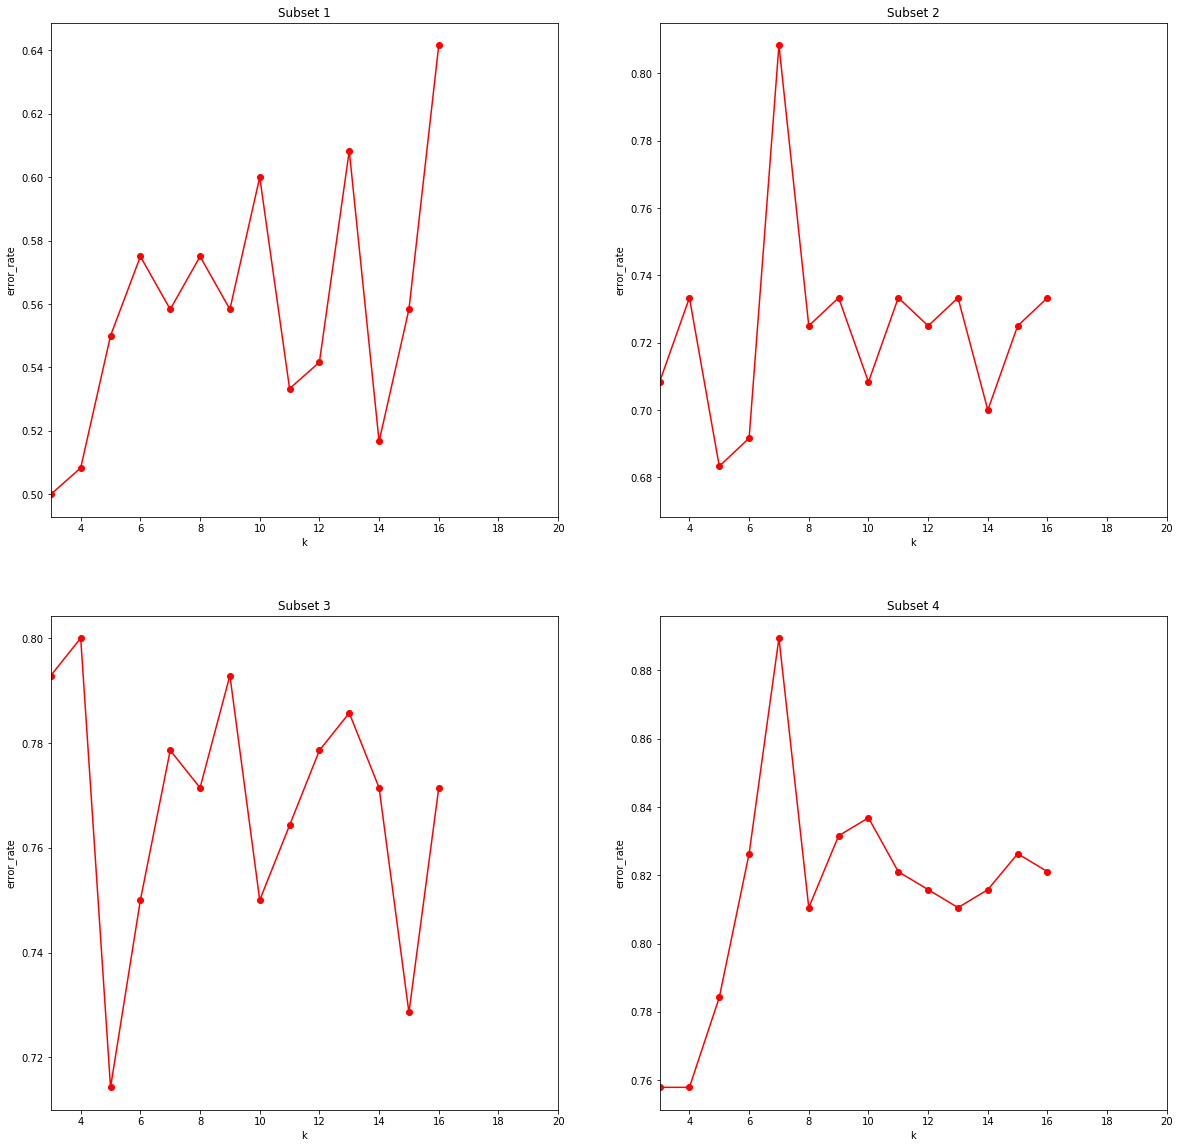

In [12]:
plt.figure(figsize=(20, 20))
for i in range(4): 
    error_rate = []
    for k in range(3,20):
        error_rate.append(pca_classify(T, train_labels, test_subsets[i], test_labels, first_twenty, k))
    plt.subplot(2,2,i+1)
    plt.plot(error_rate, 'ro-')
    plt.xlabel('k')
    plt.xlim([3,20])
    plt.ylabel('error_rate')
    plt.title('Subset '+str(i+1))
plt.show()

The first three singular vectors determine most of the faces. As we can see in all the subsets, the error rate decreases when the number of singular vectors increase from 1 to 3. Then the error rate increases, which means the first three singular vectors are the most prominent in recognizing a face.